In [2]:

import pandas as pd
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
data = pd.read_csv(url)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape
data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [4]:
data = data.drop_duplicates().reset_index(drop = True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape
# veo que se ha eliminado una fila

(1337, 7)

Elminacion de variables: en este caso considero que todas las variables son necesarias

In [6]:
data.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

ANALISIS DE VARIABLES CATEGORICAS

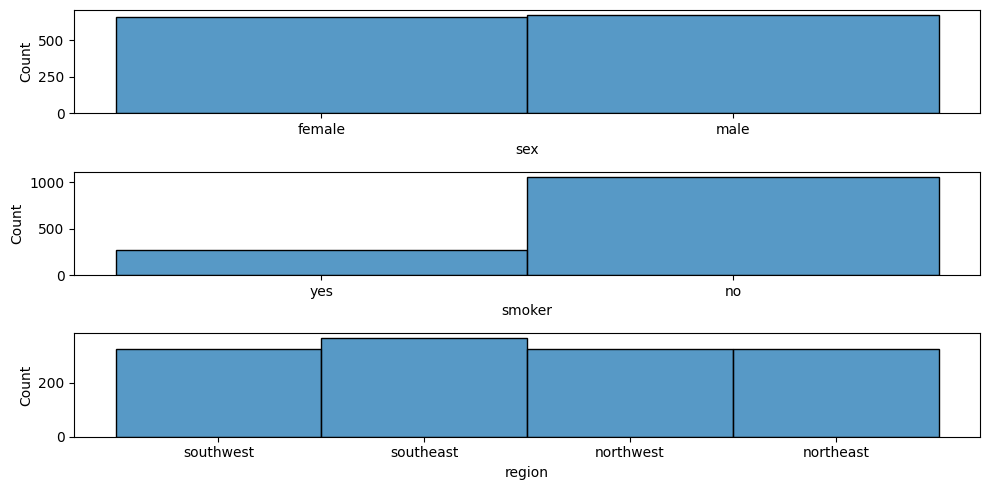

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, figsize=(10, 5))

# Create Histogram
sns.histplot(ax = axis[0], data = data, x = "sex")
sns.histplot(ax = axis[1], data = data, x = "smoker")
sns.histplot(ax = axis[2], data = data, x = "region")


# fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

sex :  observamos que el  numero de mujeres es ligeramente superior a los hombres
smoker : la gran mayoria son no fumadores
region: casi todas las personas estan distribuidas proporcionalmente en las 4 regiones, aunque con una mayor concentracion en el sureste


ANALISIS DE VARIABLES NUMERICAS

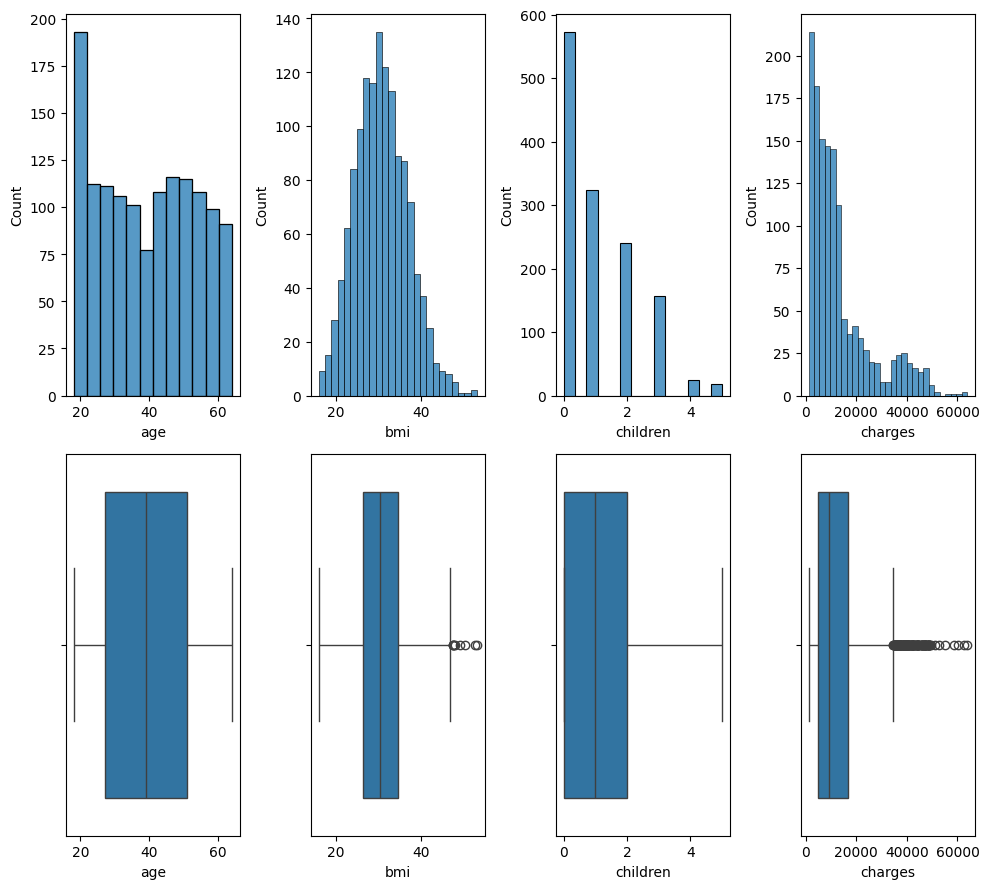

In [8]:
fig, axis = plt.subplots(2, 4, figsize = (10, 9))

sns.histplot(ax = axis[0, 0], data = data, x = "age")
sns.boxplot(ax = axis[1, 0], data = data, x = "age")
sns.histplot(ax = axis[0, 1], data = data, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = data, x = "bmi")
sns.histplot(ax = axis[0, 2], data = data, x = "children")
sns.boxplot(ax = axis[1, 2], data = data, x = "children")
sns.histplot(ax = axis[0, 3], data = data, x = "charges")
sns.boxplot(ax = axis[1, 3], data = data, x = "charges")

plt.tight_layout()

# Show the plot
plt.show()

age: observamos que la edad mayoritaria esta en los 20 años
bmi: el indice de masa corporal sigue una distribucion normal , con la mediana situada en los 30kg, aunque en el boxplot observamos algunos valores atipicos que puede corresponder con personas muy obsesas pero fuera de la mayoria de la poblacion 
children: la mayoria no tiene hijos, el sugundo mayor nuemero son las personas con un hijo
charges: observamos que la mayoria de primas estan concentradas debajo de los 15000 en este caso vamos a suponer que son dolares, y tambien observamos muchos valores atipicos con primas muy elevadas

FACTORIZAMOS PARA VER LAS CORRELACIONES

In [9]:
data["sex"] = pd.factorize(data["sex"])[0]
data["smoker"] = pd.factorize(data["smoker"])[0]
data["region"] = pd.factorize(data["region"])[0]
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


sex = 0 para mujeres, 1 para hombres
smoker = 0 para fumadores, 1 para no fumadores
region = 0 para southwest , 1 para southeast, 2 para northwest, 3 para northeast

ACONTINUACION VEMOS LAS CORRELACIONES

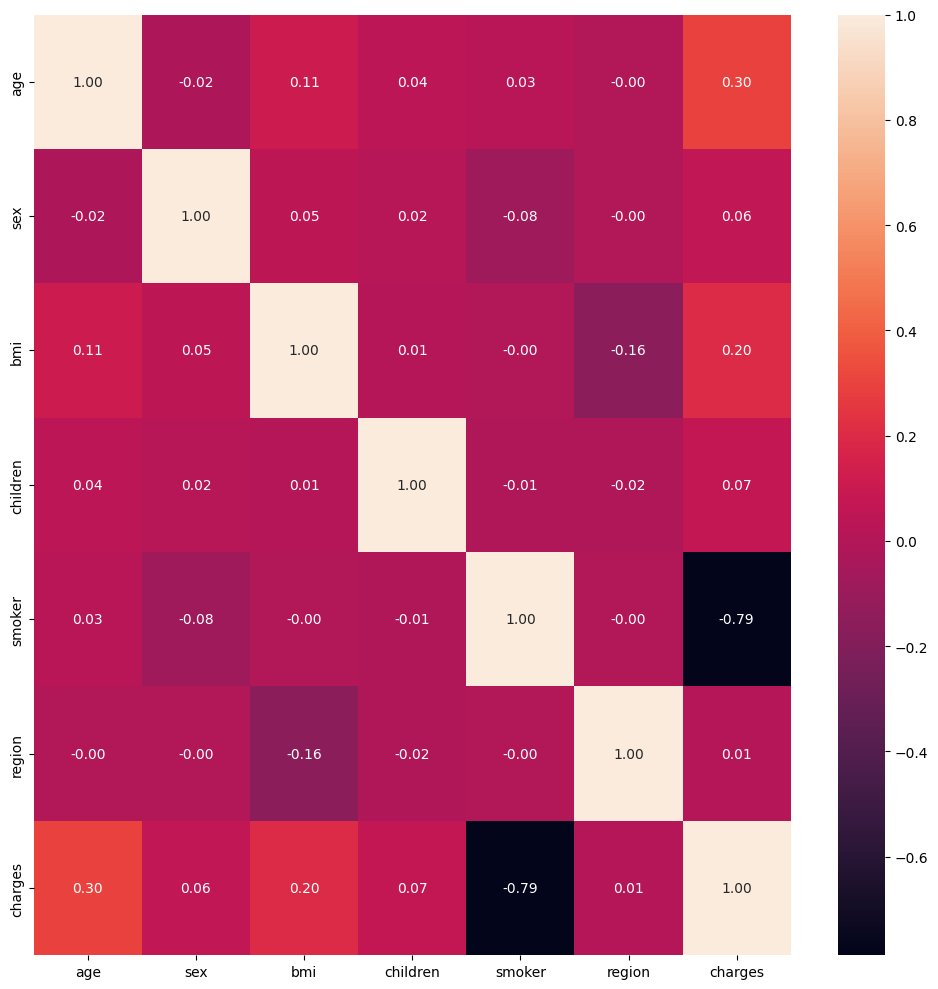

In [10]:
fig, axes = plt.subplots(figsize=(10, 10))

sns.heatmap(data[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges' ]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

la varibale mas correlacionada con la prima es la edad y el indice de masa corporal , vemos que la region es la menos correlacionada

In [11]:

data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,1.483919,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,1.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


 observamos un mayor nuemro de outlyers  en la prima pero en este caso no los vamos a eliminar


ANALISIS DE LOS VALORES FALTANTES

In [12]:
data.isnull().sum().sort_values(ascending = False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

VAMOS A DIVIDIR LOS DATOS EN TRAIN Y TEST, LO DIVIDIMOS PRIMERO SIN ESCALAR


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split
from pickle import dump, load

# Definir tu objeto scaler (por ejemplo, StandardScaler)
scaler = StandardScaler()

num_variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

X = data.drop("charges", axis=1)[num_variables]
y = data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Guardar características del conjunto de entrenamiento
X_train.to_csv("../data/processed/train_X.csv", index=False)

# Guardar etiquetas del conjunto de entrenamiento
with open("../data/processed/train_y.txt", "w") as f:
    f.write(y_train.to_string(index=False))

# Guardar características del conjunto de prueba
X_test.to_csv("../data/processed/test_X.csv", index=False)

# Guardar etiquetas del conjunto de prueba en un archivo diferente
with open("../data/processed/test_y.txt", "w") as f:
    f.write(y_test.to_string(index=False))

# Guardar el objeto scaler
dump(scaler, open("../models/modelsinescala.pk", "wb"))
X_train.head()


,age,sex,bmi,children,smoker,region
996,63,0,36.85,0,1,1
1173,29,1,32.11,2,1,2
207,35,1,27.74,2,0,3
669,30,1,31.57,3,1,1
293,22,0,28.82,0,1,1


AHORA PROCEDEMOS A NORMALIZAR LOS DATOS Y DESPUES GUARDARLOS

In [14]:
from sklearn.preprocessing import StandardScaler
from pickle import dump
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)


X_train_norm.to_csv("../data/processed/train_X_norm.csv", index=False)
X_test_norm.to_csv("../data/processed/test_X_norm.csv", index=False)
dump(scaler, open("../data/processed/norm_scaler.pk", "wb"))

X_train_norm.head()





,age,sex,bmi,children,smoker,region
996,1.702634,-1.016031,1.007055,-0.927412,0.504673,-0.430300
1173,-0.736046,0.984222,0.228402,0.731840,0.504673,0.480572
207,-0.305690,0.984222,-0.489470,0.731840,-1.981481,1.391445
669,-0.664320,0.984222,0.139695,1.561466,0.504673,-0.430300
293,-1.238127,-1.016031,-0.312055,-0.927412,0.504673,-0.430300


REALIZAMOS EL PASO 5 FEATURE SELECTION CON EL MODELO NORMALIZADO Y EL MODELO SIN NORMALIZAR 

MODELO SIN NORMALIZAR

In [15]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])
X_train_sel.to_csv("../data/processed/train_X_sel.csv", index=False)
X_test_sel.to_csv("../data/processed/test_X_sel.csv", index=False)
dump(selection_model, open("../models//selection_model.pk", "wb"))
X_train_sel.head()

,age,sex,bmi,smoker
0,63.0,0.0,36.85,1.0
1,29.0,1.0,32.11,1.0
2,35.0,1.0,27.74,0.0
3,30.0,1.0,31.57,1.0
4,22.0,0.0,28.82,1.0


MODELO NORMALIZADO

In [20]:
selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train_norm, y_train)
ix = selection_model.get_support()
X_train_norm_sel = pd.DataFrame(selection_model.transform(X_train_norm), columns = X_train.columns.values[ix])
X_test_norm_sel = pd.DataFrame(selection_model.transform(X_test_norm), columns = X_test.columns.values[ix])


X_train_norm_sel.rename(columns={'age': 'age_n'}, inplace=True)
X_train_norm_sel.rename(columns={'sex': 'sex_n'}, inplace=True)
X_train_norm_sel.rename(columns={'bmi': 'bmi_n'}, inplace=True)
X_train_norm_sel.rename(columns={'smoker': 'smoker_n'}, inplace=True)

X_test_norm_sel.rename(columns={'age': 'age_n'}, inplace=True)
X_test_norm_sel.rename(columns={'sex': 'sex_n'}, inplace=True)
X_test_norm_sel.rename(columns={'bmi': 'bmi_n'}, inplace=True)
X_test_norm_sel.rename(columns={'smoker': 'smoker_n'}, inplace=True)



X_train_norm_sel.to_csv("../data/processed/train_X_norm_sel.csv", index=False)
X_test_norm_sel.to_csv("../data/processed/test_X_norm_sel.csv", index=False)
dump(selection_model, open("../models/selection_model_norm.pk", "wb"))


X_train_norm_sel.head()

,age_n,sex_n,bmi_n,smoker_n
0,1.702634,-1.016031,1.007055,0.504673
1,-0.736046,0.984222,0.228402,0.504673
2,-0.305690,0.984222,-0.489470,-1.981481
3,-0.664320,0.984222,0.139695,0.504673
4,-1.238127,-1.016031,-0.312055,0.504673


GURADO LOS MODELOS NORMALIZADO Y NO NORMALIZADO UNA VEZ APLICADO EL FEATURE SELECTION

GUARDO SIN NORMALIZAR

In [21]:
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)

X_train_sel.to_csv("../data/raw/sel_train.csv", index = False)
X_test_sel.to_csv("../data/raw/sel_test.csv", index = False)

print(X_train_sel.head())

    age  sex    bmi  smoker     charges
0  63.0  0.0  36.85     1.0  13887.9685
1  29.0  1.0  32.11     1.0   4433.9159
2  35.0  1.0  27.74     0.0  20984.0936
3  30.0  1.0  31.57     1.0   4837.5823
4  22.0  0.0  28.82     1.0   2156.7518


GUARDO NORMALIZADO

In [22]:
X_train_norm_sel["charges"] = list(y_train)
X_test_norm_sel["charges"] = list(y_test)

X_train_norm_sel.to_csv("../data/raw/norm_sel_train.csv", index = False)
X_test_norm_sel.to_csv("../data/raw/norm_sel_test.csv", index = False)

AHORA REALIZAREMOS EL MACHINE LEARNING
